In [1]:
t1,t2 = 1000,2000

In [2]:
%matplotlib notebook
import sys
import math as mth
import numpy as np
#import matplotlib.pyplot as plt

from pylab import *

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
def Shannon(dataslide):
    P=0
    H=0
    for j in dataslide:
        P=P+j[3]
    for j in dataslide:
        p = j[3]/P
        H=H+(p*(mth.log(p)))
    if (H!=0):H=(-1)*H
    
    return H

In [5]:
#def Tmax(datafile):
#    dataset = np.genfromtxt(datafile, skip_header=1)
#    t = dataset[len(dataset)-1][0]
#    #print(t)
#    return t

In [6]:
def DiversityIndices2(datafile,t1,t2):
    
    t_list = []
    R_list = []
    H_list = []
    E_list = []

    t0 = t1
    
    dataset = np.genfromtxt(datafile, skip_header=1)
    dataslide = []
    
    tmp1=0
    tmp2=0
    
    for i in range(1,len(dataset)):
        if dataset[i][0] == t1:
            tmp1 = i+2
            break;
    for i in range(tmp1,len(dataset)):            
        if dataset[i][0] == t2:
            tmp2 = i+2
            break;
        
    t1 = tmp1
    t2 = tmp2
    
    for i in range(t1,t2):        
        if float(dataset[i][0]) != float(t0):
            
            R = len(dataslide)
            H = Shannon(dataslide)
            
            E = (H/(mth.log(R)))
            
            t_list.append(t0)
            R_list.append(R)
            H_list.append(H)
            E_list.append(E)
            
           
            dataslide = []
            t0=t0+1
            
        dataslide.append(dataset[i])
        
    if dataset[i][0] == dataset[len(dataset)-1][0]:
        
        R = len(dataslide)
        H = Shannon(dataslide)
        E = (H/(mth.log(R)))
        
        t_list.append(t0)
        R_list.append(R)
        H_list.append(H)
        E_list.append(E)
        
       
        dataslide = []

    
    return t_list, R_list, H_list, E_list

In [7]:
#virus_file = "mu1e-7_initialDiffDp1_S10P15_R-12499_data-phage.txt"
#Tb,Rb,Hb, Eb = DiversityIndices2(virus_file,200,300)

In [8]:
virus_file = "mu1e-7_initialDiffDp1_S10P15_R-12499_data-phage.txt"
bacteria_file = "mu1e-7_initialDiffDp1_S10P15_R-12499_data-bact.txt"
#tmax = Tmax(virus_file)

In [9]:
#Tv,Rv,Hv, Ev = DiversityIndices(virus_file)
#Tb,Rb,Hb, Eb = DiversityIndices(bacteria_file)

In [10]:
#def f(t1,t2):
#    return t1,t2

In [11]:
#interact_manual(f, t1=widgets.IntSlider(min=1,max=tmax,step=1, value=1),t2=widgets.IntSlider(min=1,max=tmax-1,step=1,value=tmax));

In [12]:
#t1,t2 = 100,200

In [13]:
Tv,Rv,Hv,Ev = DiversityIndices2(virus_file,t1,t2)
Tb,Rb,Hb,Eb = DiversityIndices2(bacteria_file,t1,t2)

/home/sergio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [14]:
#Tv,Rv,Hv,Ev = DiversityIndices2(virus_file,100,2000)
#Tb,Rb,Hb,Eb = DiversityIndices2(bacteria_file,100,2000)

<IPython.core.display.Javascript object>


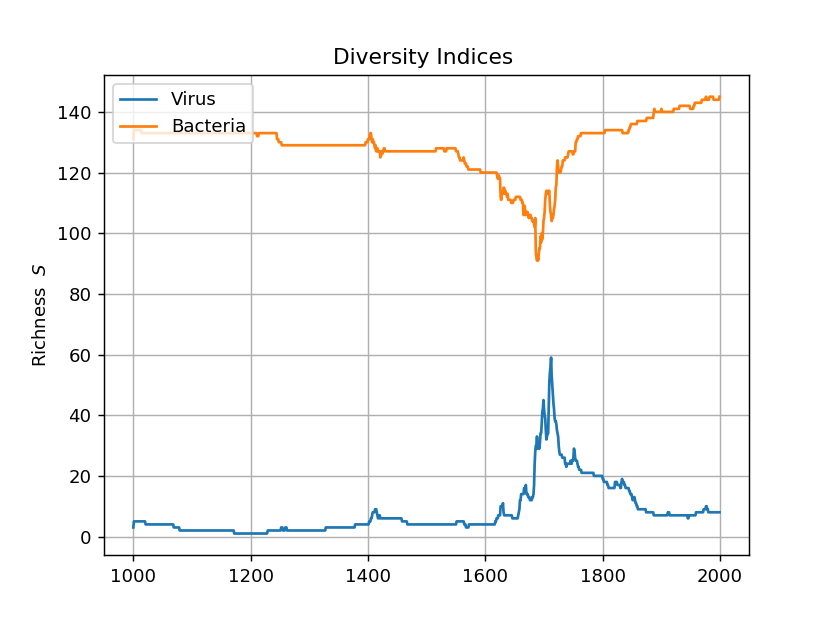

Text(0,0.5,'Richness  $S$')

In [15]:
#subplot(311) # Grafica uno
figure(dpi= 130)
plot(Tv, Rv, '-', label='Virus')
plot(Tb, Rb, '-', label='Bacteria')
grid(True)
legend(loc='upper left')
title('Diversity Indices ')
ylabel('Richness  $S$')
#figure(figsize=(18, 160), dpi= 80, facecolor='w', edgecolor='k')
#figure(dpi= 300)

<IPython.core.display.Javascript object>


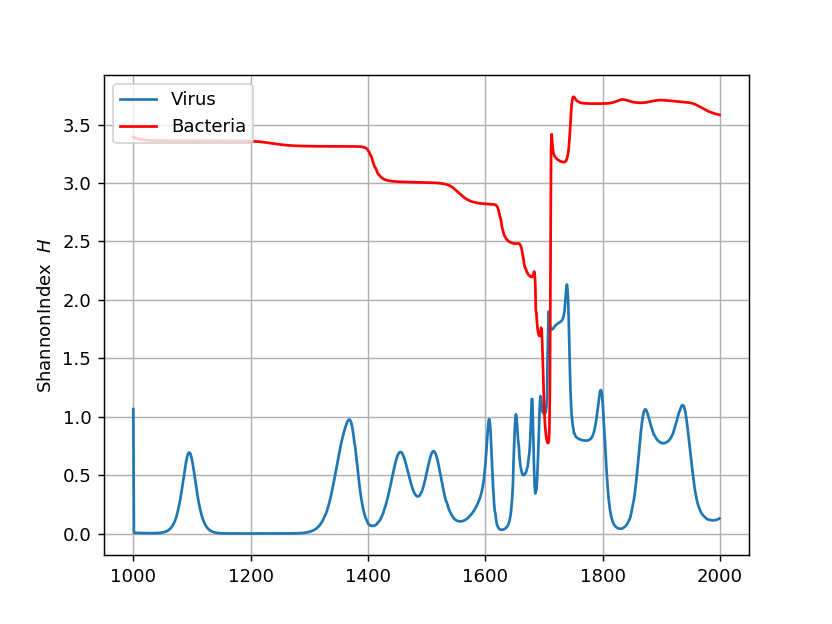

Text(0,0.5,'ShannonIndex  $H$')

In [16]:
figure(dpi= 130)
plot(Tv, Hv, label='Virus')
plot(Tb, Hb, 'r', label='Bacteria')
grid(True)
legend(loc='upper left')
#xlabel('time $t$ (hr)')
ylabel('ShannonIndex  $H$')

<IPython.core.display.Javascript object>


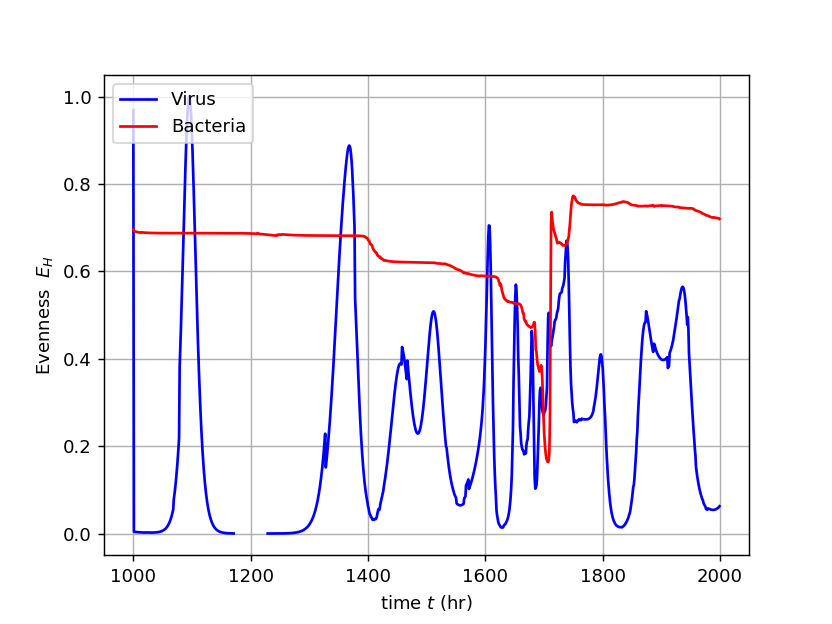

Text(0,0.5,'Evenness  $E_H$')

In [17]:
figure(dpi= 130)
plot(Tv, Ev, 'b', label='Virus')
plot(Tb, Eb, 'r', label='Bacteria')
grid(True)
legend(loc='upper left')
xlabel('time $t$ (hr)')
ylabel('Evenness  $E_H$')